In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  

In [4]:
# Load CSV file
data = pd.read_csv('fashion_train.csv')

# Prepare data
labels = data['label'].copy().to_numpy()
features = data.drop('label', axis=1).to_numpy()

In [3]:
# Split data into a train and a test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [4]:
# Find highest accuracy based on k (n_neighbors) with default test_size = 0.2

accuracies = []

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train classifier
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with k={k}: {accuracy}")

best_k = np.argmax(accuracies) + 1
print(f"\nThe highest accuracy is achieved with k={best_k}: {accuracies[best_k-1]}")


"""""
Result:

Accuracy with k=1: 0.8485833333333334
Accuracy with k=2: 0.8449166666666666
Accuracy with k=3: 0.8561666666666666
Accuracy with k=4: 0.8550833333333333
Accuracy with k=5: 0.8558333333333333
Accuracy with k=6: 0.8574166666666667
Accuracy with k=7: 0.8551666666666666
Accuracy with k=8: 0.8545
Accuracy with k=9: 0.8530833333333333

The highest accuracy is achieved with k=6: 0.8574166666666667
"""""


Accuracy with k=1: 0.8485833333333334
Accuracy with k=2: 0.8449166666666666
Accuracy with k=3: 0.8561666666666666
Accuracy with k=4: 0.8550833333333333
Accuracy with k=5: 0.8558333333333333
Accuracy with k=6: 0.8574166666666667
Accuracy with k=7: 0.8551666666666666
Accuracy with k=8: 0.8545
Accuracy with k=9: 0.8530833333333333

The highest accuracy is achieved with k=6: 0.8574166666666667


In [5]:
# Find highest accuracy based on the test_size

accuracies = []

test_size = [0.1, 0.2, 0.3, 0.4, 0.5]

for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=i, random_state=42)

    # Training and predicttion
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with test_size={i}: {accuracy}")

max = np.argmax(accuracies)
best_test_size = test_size[max]
print(f"\nThe highest accuracy is achieved by the test_size={best_test_size}: {accuracies[max]}")

"""""
Result:

Accuracy with test_size=0.1: 0.8588333333333333
Accuracy with test_size=0.2: 0.8574166666666667
Accuracy with test_size=0.3: 0.8565
Accuracy with test_size=0.4: 0.85375
Accuracy with test_size=0.5: 0.8494333333333334

The highest accuracy is achieved by the test_size=0.1: 0.8588333333333333
"""""

Accuracy with test_size=0.1: 0.8588333333333333
Accuracy with test_size=0.2: 0.8574166666666667
Accuracy with test_size=0.3: 0.8565
Accuracy with test_size=0.4: 0.85375
Accuracy with test_size=0.5: 0.8494333333333334
The highest accuracy is achieved by the test_size=0.1: 0.8588333333333333


In [5]:
# Perform classification based on best_k and best_test_size

#best_k = 6
#best_test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=best_test_size, random_state=42)

# Training and predicttion
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8588333333333333


misclassified_indices: [3, 7, 10, 27, 30, 34, 38, 41, 42, 51, 60, 73, 77, 78, 92, 100, 109, 112, 129, 139, 154, 159, 164, 183, 213, 221, 226, 229, 230, 243, 250, 251, 252, 253, 265, 280, 309, 311, 312, 315, 333, 336, 337, 339, 360, 367, 373, 378, 391, 393, 398, 422, 429, 448, 454, 459, 465, 470, 473, 476, 477, 490, 491, 506, 512, 513, 518, 531, 542, 548, 554, 577, 584, 589, 591, 607, 619, 637, 639, 641, 643, 647, 652, 654, 691, 693, 717, 725, 730, 732, 734, 745, 751, 757, 763, 773, 775, 779, 790, 792, 793, 798, 806, 822, 826, 827, 834, 836, 842, 847, 851, 867, 872, 880, 886, 888, 889, 899, 903, 905, 916, 921, 934, 947, 952, 953, 959, 962, 964, 986, 999, 1000, 1008, 1014, 1023, 1040, 1042, 1043, 1052, 1054, 1058, 1070, 1074, 1078, 1080, 1091, 1092, 1100, 1103, 1129, 1138, 1142, 1144, 1157, 1176, 1177, 1181, 1182, 1189, 1194, 1203, 1205, 1241, 1243, 1245, 1252, 1261, 1262, 1269, 1275, 1278, 1280, 1287, 1295, 1301, 1312, 1313, 1316, 1321, 1322, 1333, 1334, 1336, 1338, 1340, 1344, 1360, 13

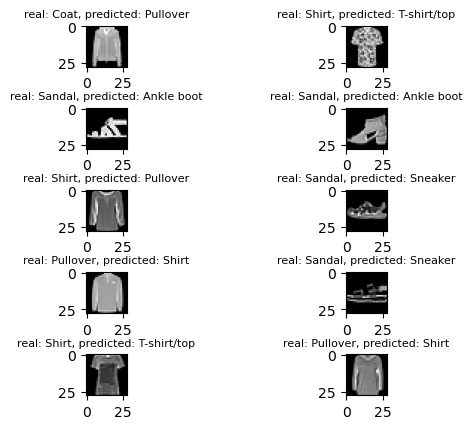

In [7]:
# Get missclassified data
import matplotlib.pyplot as plt
import random

# y_test: correct label
# y_pred: predicited label

# Find indices where predicted labels don't match the true labels
misclassified_indices = [i for i in range(len(y_test)) if y_pred[i] != y_test[i]]

print(f"misclassified_indices: {misclassified_indices}")
print(f"number of misclassified images: {len(misclassified_indices)}")
print(f"number of test images: {len(y_test)}")
print(f"accuracy: {1- len(misclassified_indices) / len(y_test)}")

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

random_misclassified_indices = random.sample(misclassified_indices, k=10)
i=1

for id in random_misclassified_indices:
    image = X_test[id].reshape(28, 28)
    label = "real: " + class_names[y_test[id]] + ", predicted: " + class_names[y_pred[id]]
    plt.subplot(5,2,i)
    plt.imshow(image, cmap='gray')
    plt.title("{}".format(label),fontsize=8)
    plt.subplots_adjust(hspace=1, wspace=0.1)
    i+=1
   
plt.show()